# Chart visualization

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.close("all")

### Basic plotting: plot

<Axes: title={'center': 'Cumulative Sum of Random Values'}>

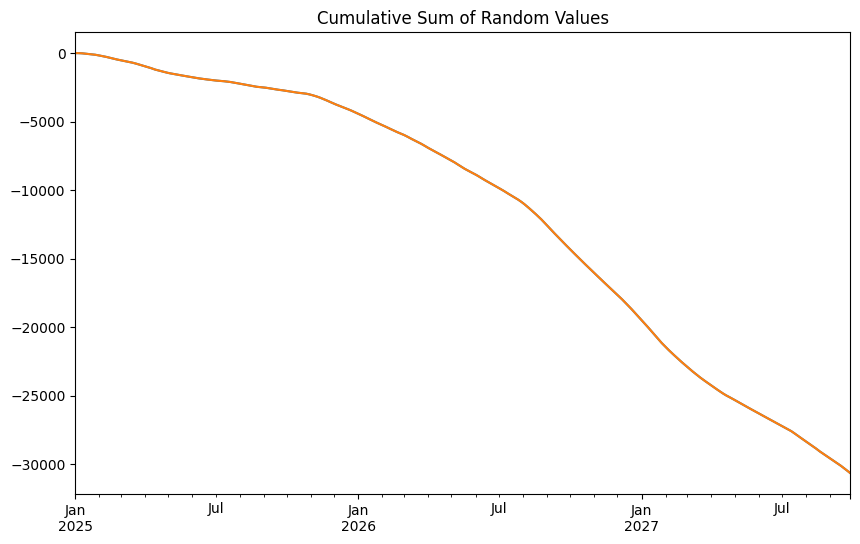

In [6]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(1000).cumsum(), index=pd.date_range("1/1/2025", periods=1000))
ts = ts.cumsum()
ts.plot(title="Cumulative Sum of Random Values", figsize=(10, 6), grid=True)    
ts.plot()

<Axes: >

<Figure size 640x480 with 0 Axes>

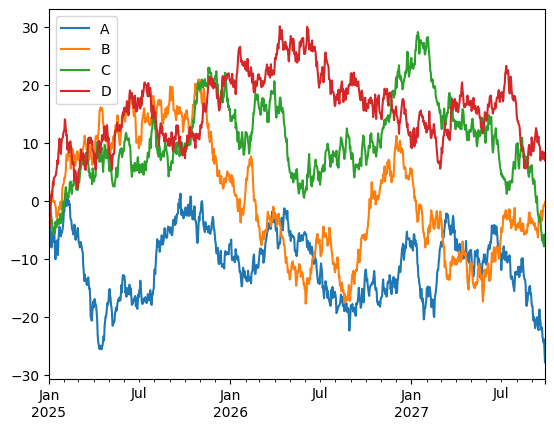

In [16]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
plt.figure()
df.plot()

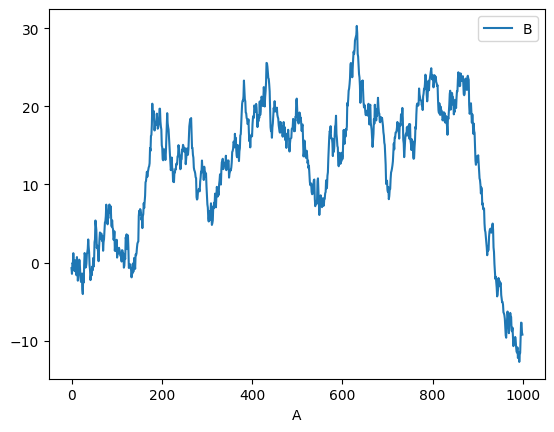

In [17]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

df3["A"] = pd.Series(list(range(len(df))))

df3.plot(x="A", y="B");

## Other plots



Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or ‘density’ for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

<Axes: title={'center': 'Bar plot of row 5'}>

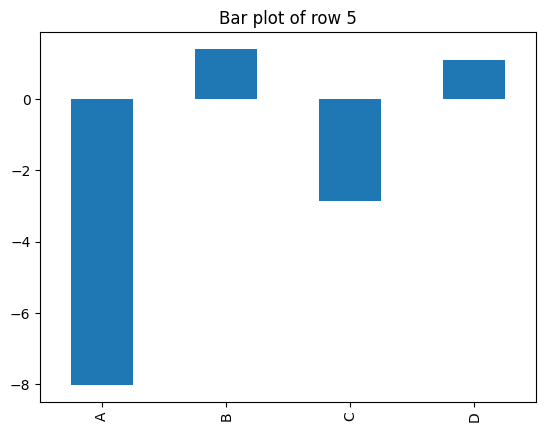

In [18]:
plt.figure()
df.iloc[5].plot(kind="bar", title="Bar plot of row 5")

## Bar plots
For labeled, non-time series data, you may wish to produce a bar plot:

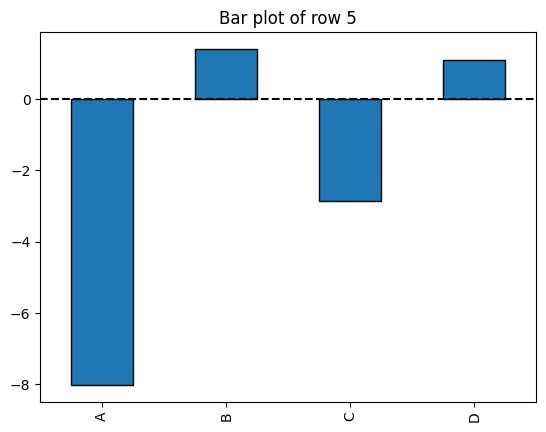

In [20]:
plt.figure()
df.iloc[5].plot(kind="bar", title="Bar plot of row 5", color="C0", edgecolor="k")
plt.axhline(0, color="k", linestyle="--")

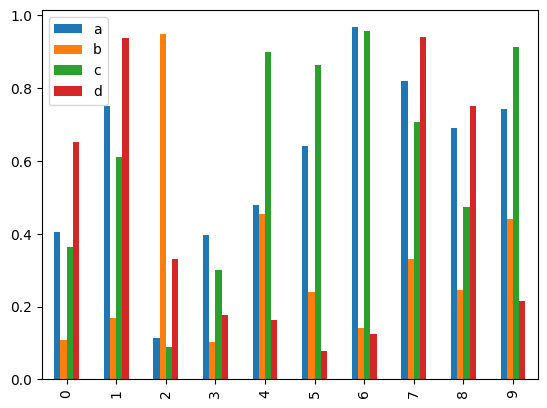

In [21]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar();

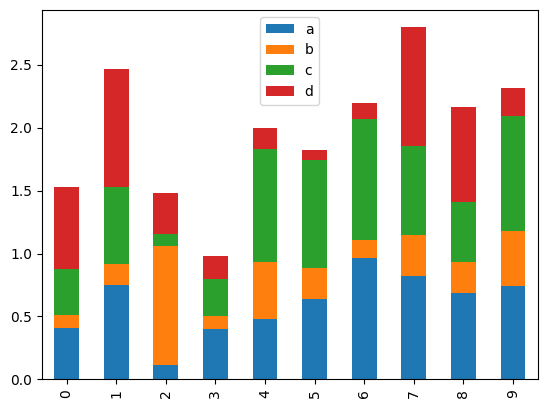

In [22]:
df2.plot.bar(stacked=True);

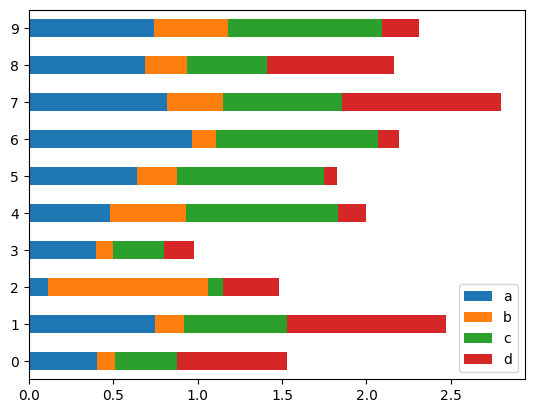

In [23]:
df2.plot.barh(stacked=True);

## Histograms
Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods.

<Axes: title={'center': 'Histogram of Random Values'}, ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

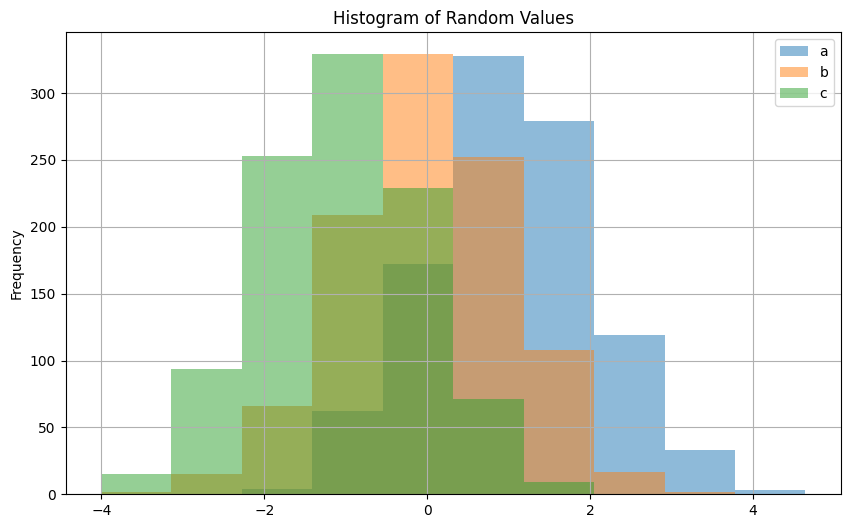

In [26]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"]
)

plt.figure()
df4.plot.hist(
    alpha=0.5, title="Histogram of Random Values", figsize=(10, 6), grid=True
)

<Axes: ylabel='Frequency'>

<Figure size 1000x600 with 0 Axes>

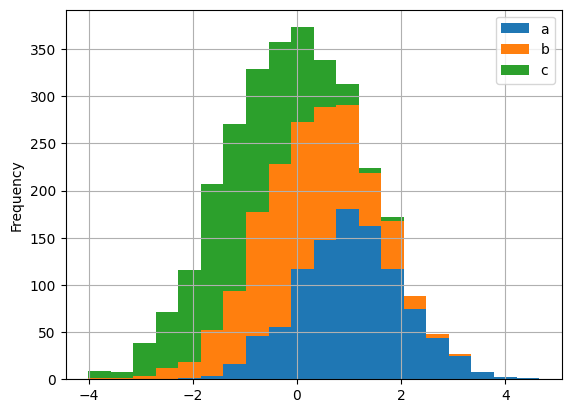

In [33]:
plt.figure(figsize=(10, 6));

df4.plot.hist(stacked=True, bins=20, grid=True)


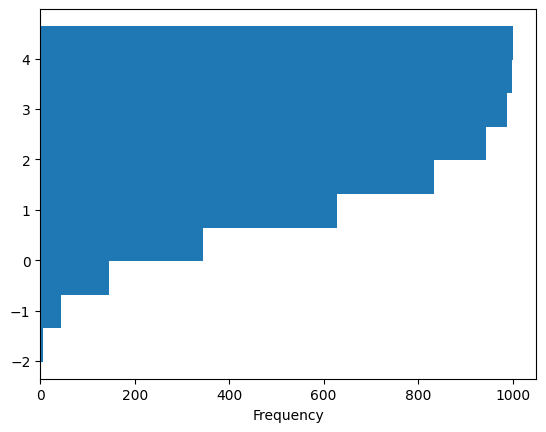

In [34]:
plt.figure();
df4["a"].plot.hist(orientation="horizontal", cumulative=True);

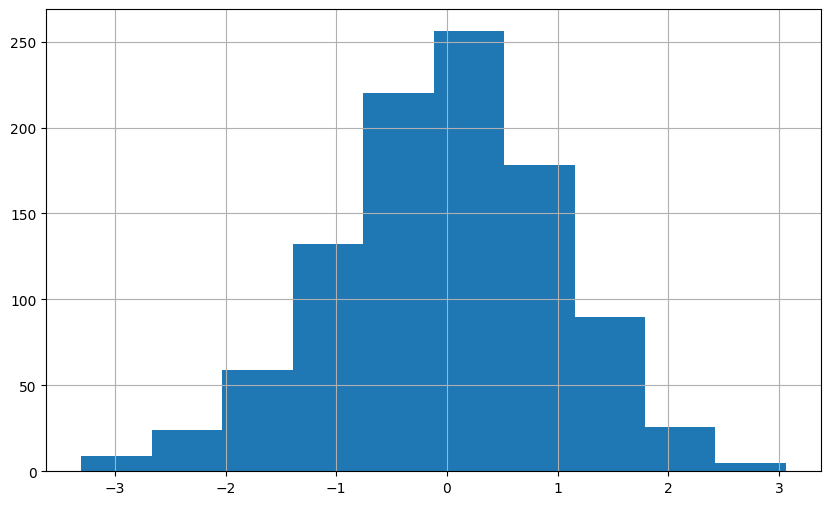

In [40]:
plt.figure(figsize=(10, 6));

df["A"].diff().hist();

<Figure size 640x480 with 0 Axes>

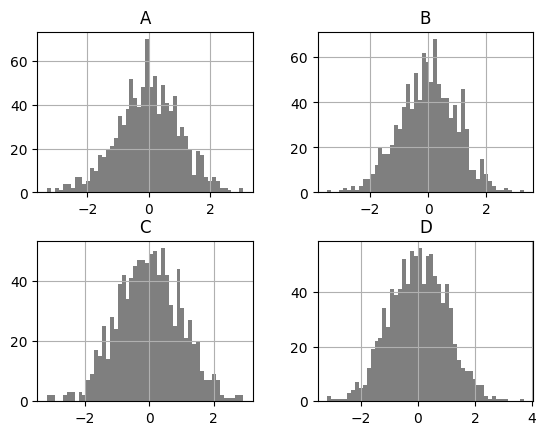

In [45]:
plt.figure();

df.diff().hist(color="k", alpha=0.5, bins=50);

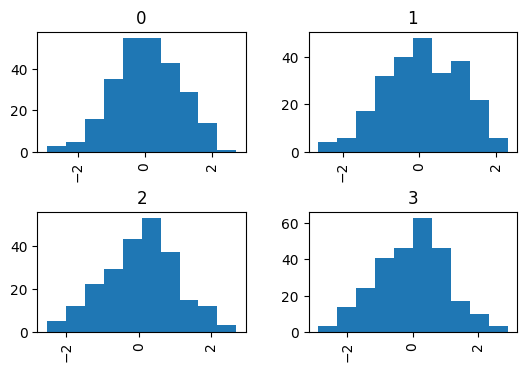

In [44]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4));

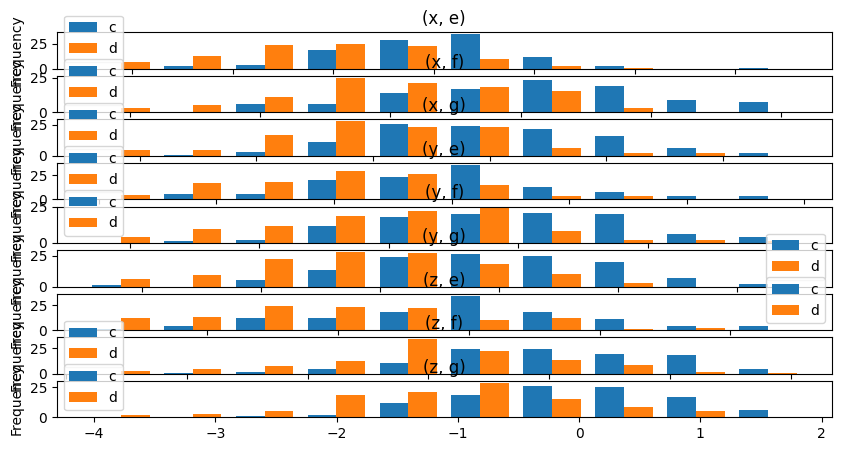

In [46]:
data = pd.DataFrame(
    {
        "a": np.random.choice(["x", "y", "z"], 1000),
        "b": np.random.choice(["e", "f", "g"], 1000),
        "c": np.random.randn(1000),
        "d": np.random.randn(1000) - 1,
    },
)


data.plot.hist(by=["a", "b"], figsize=(10, 5));


## Box plots
Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

<Axes: >

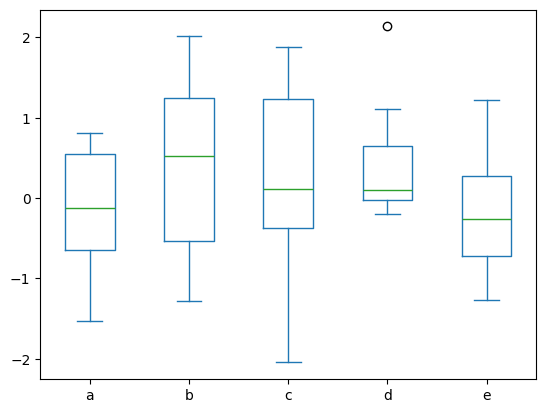

In [47]:
df = pd.DataFrame(np.random.randn(10, 5),columns=["a", "b", "c", "d", "e"])
df.plot(kind="box")

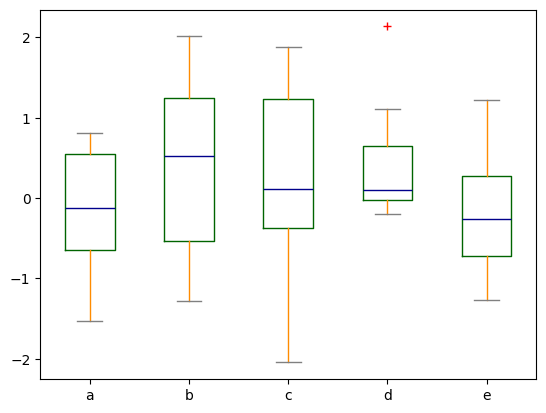

In [48]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}


df.plot.box(color=color, sym="r+");

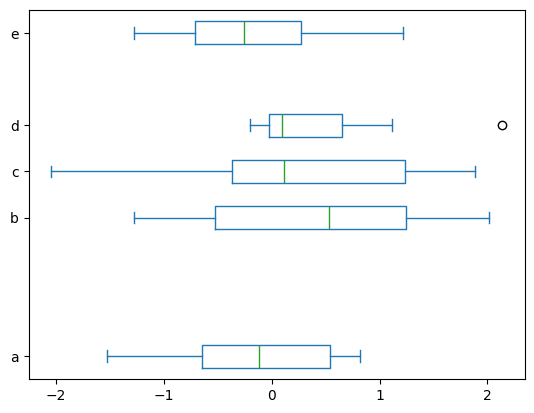

In [49]:
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);

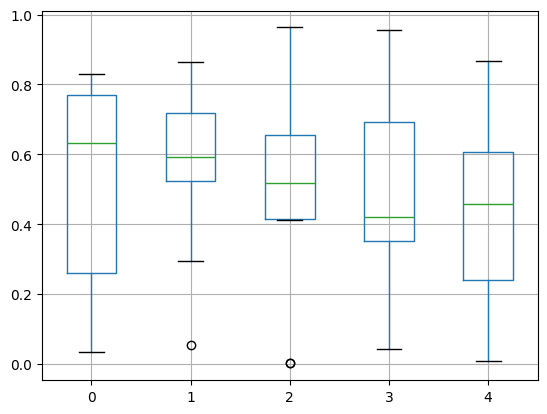

In [53]:
df = pd.DataFrame(np.random.rand(10, 5))

plt.figure();

bp = df.boxplot()

<Figure size 640x480 with 0 Axes>

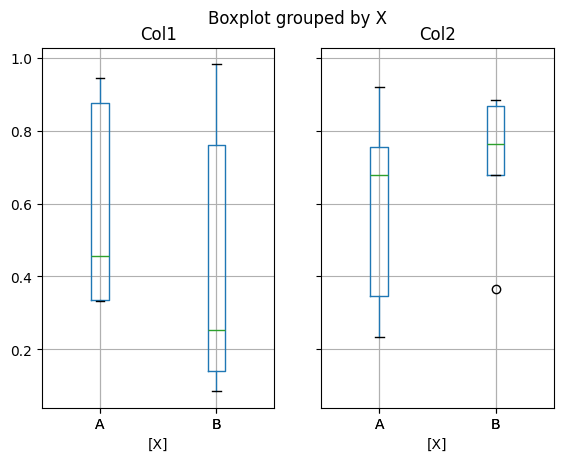

In [56]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

plt.figure();

bp = df.boxplot(by="X")

You could also create groupings with DataFrame.plot.box(), for instance:

<Figure size 640x480 with 0 Axes>

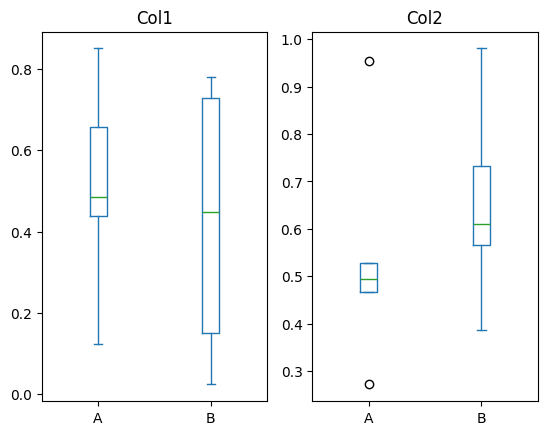

In [57]:
df = pd.DataFrame(np.random.rand(10, 3), columns=["Col1", "Col2", "Col3"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

plt.figure();

bp = df.plot.box(column=["Col1", "Col2"], by="X")

In boxplot, the return type can be controlled by the return_type, keyword. The valid choices are {"axes", "dict", "both", None}

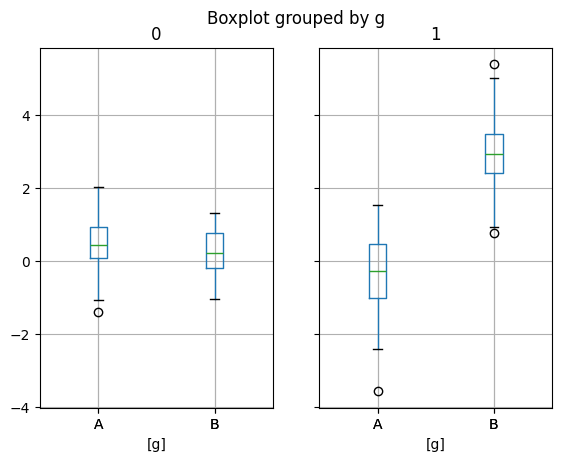

In [58]:
np.random.seed(1234)

df_box = pd.DataFrame(np.random.randn(50, 2))

df_box["g"] = np.random.choice(["A", "B"], size=50)

df_box.loc[df_box["g"] == "B", 1] += 3

bp = df_box.boxplot(by="g")

## Area plot
You can create area plots with Series.plot.area() and DataFrame.plot.area(). Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

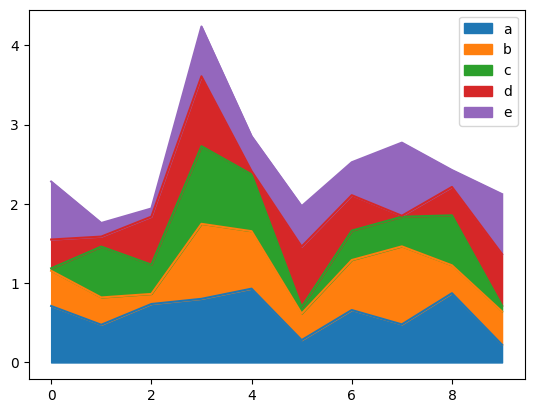

In [60]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["a", "b", "c", "d", "e"])

df.plot.area();

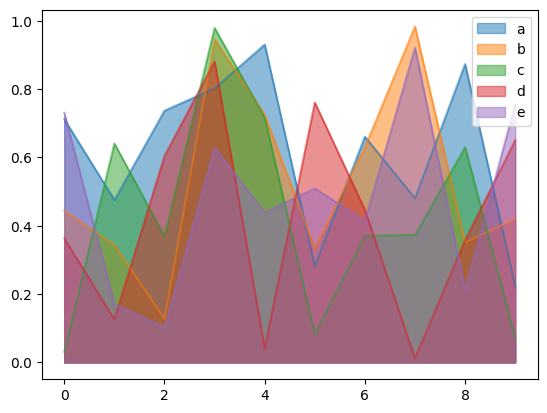

In [61]:
df.plot.area(stacked=False);

## Scatter plot
Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.

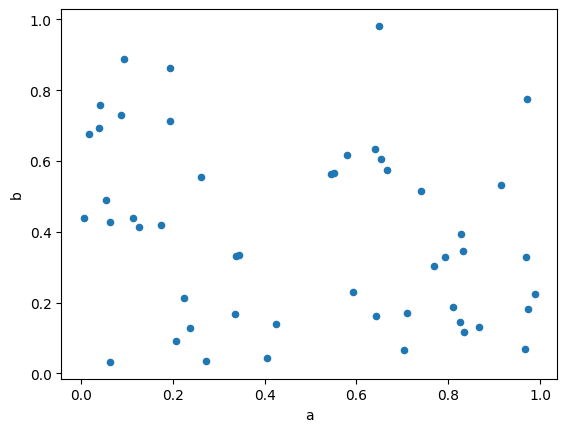

In [63]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)
df.plot.scatter(x="a", y="b");

To plot multiple column groups in a single axes, repeat plot method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups.

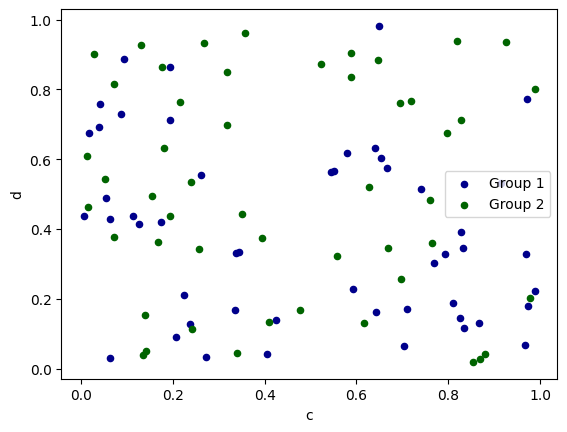

In [64]:
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")

df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);


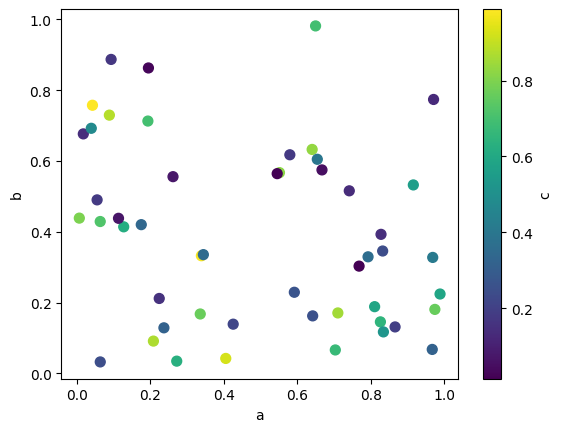

In [68]:
df.plot.scatter(x="a", y="b", c="c", s=50);

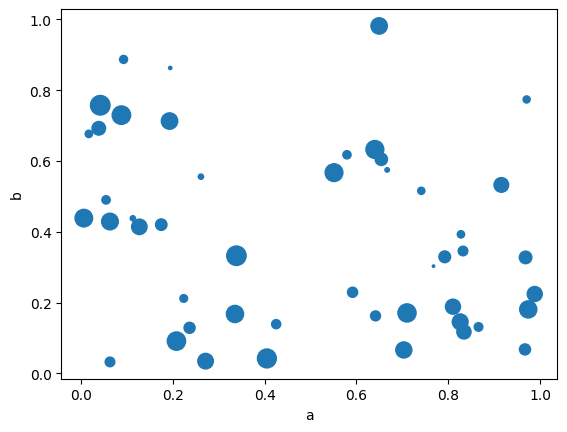

In [69]:
df.plot.scatter(x="a", y="b", s=df["c"] * 200);

## Hexagonal bin plot
You can create hexagonal bin plots with DataFrame.plot.hexbin(). Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

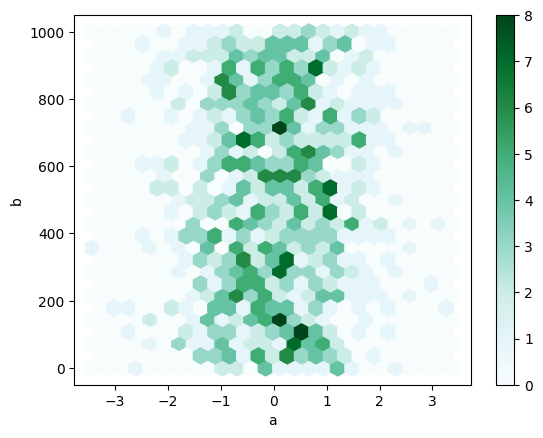

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x="a", y="b", gridsize=25);

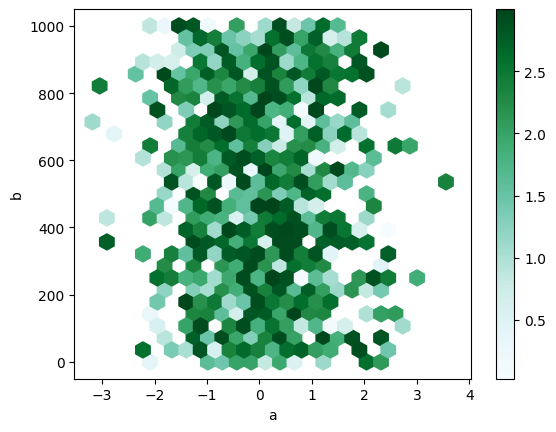

In [71]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] + np.arange(1000)

df["z"] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25);

## Pie plot
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

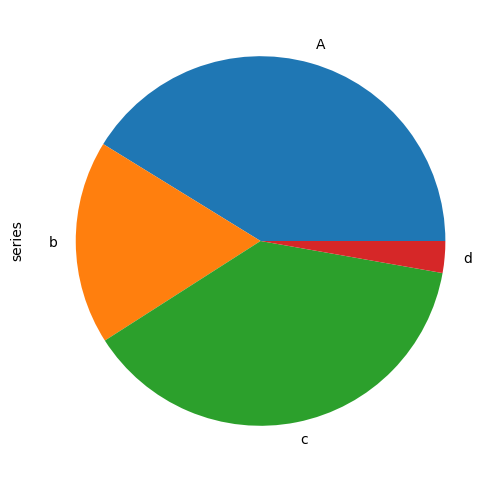

In [75]:
series = pd.Series(3 * np.random.rand(4), index=["A", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6));

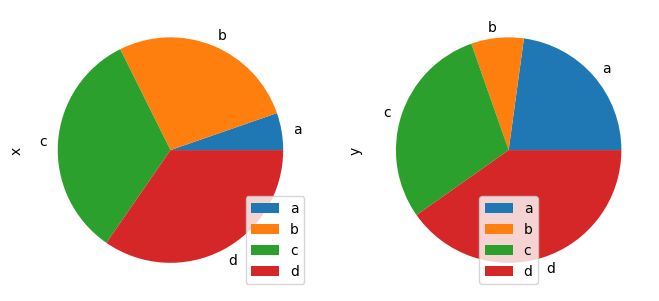

In [76]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)


df.plot.pie(subplots=True, figsize=(8, 4));

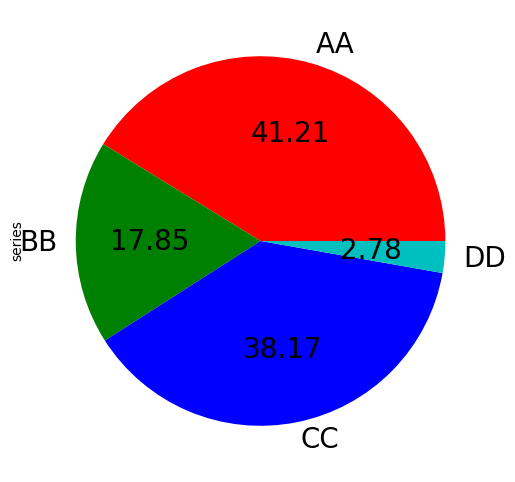

In [77]:
series.plot.pie(
    labels=["AA", "BB", "CC", "DD"],
    colors=["r", "g", "b", "c"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),
);


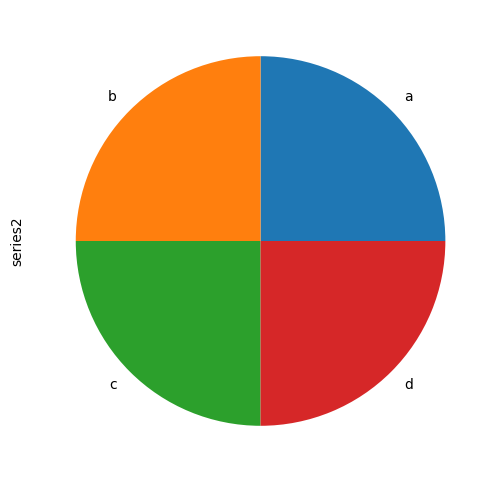

In [78]:
series = pd.Series([0.1] * 4, index=["a", "b", "c", "d"], name="series2")

series.plot.pie(figsize=(6, 6));

## Andrews curves
Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series, see the Wikipedia entry for more information. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

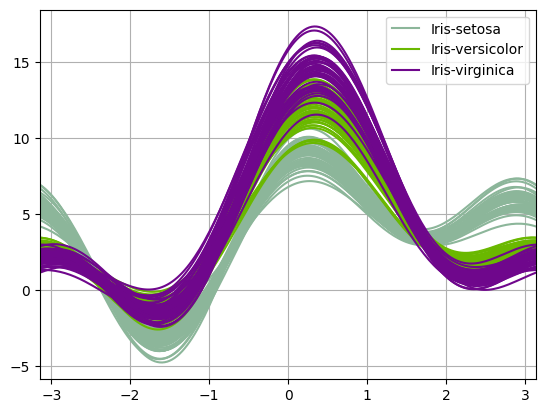

In [93]:
from pandas.plotting import andrews_curves

data = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv")

plt.figure();

andrews_curves(data, "Name");

## Parallel coordinates

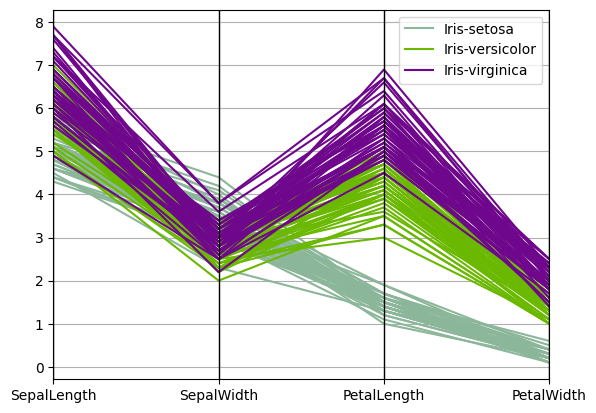

In [94]:
from pandas.plotting import parallel_coordinates

data = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv")

plt.figure();

parallel_coordinates(data, "Name");

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot.


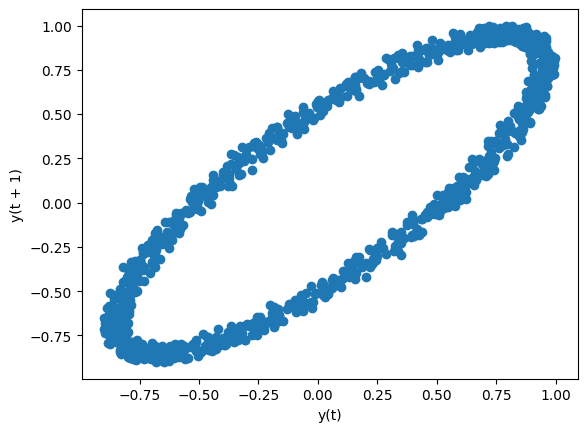

In [95]:
from pandas.plotting import lag_plot

plt.figure();

spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)

data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))

lag_plot(data);

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. 

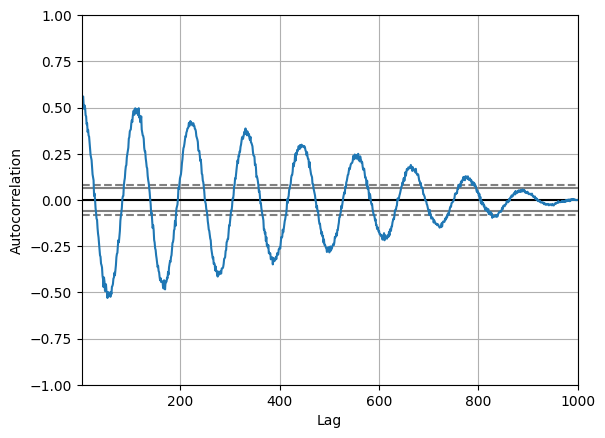

In [96]:
from pandas.plotting import autocorrelation_plot

plt.figure();

spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)

data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

autocorrelation_plot(data);

## Bootstrap plot
Bootstrap plots are used to visually assess the uncertainty of a statistic, such as mean, median, midrange, etc. A random subset of a specified size is selected from a data set, the statistic in question is computed for this subset and the process is repeated a specified number of times. Resulting plots and histograms are what constitutes the bootstrap plot.

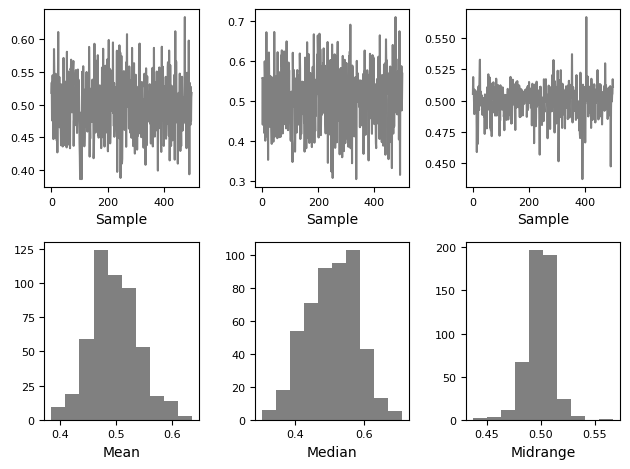

In [97]:
from pandas.plotting import bootstrap_plot

data = pd.Series(np.random.rand(1000))

bootstrap_plot(data, size=50, samples=500, color="grey");

## RadViz
RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute.

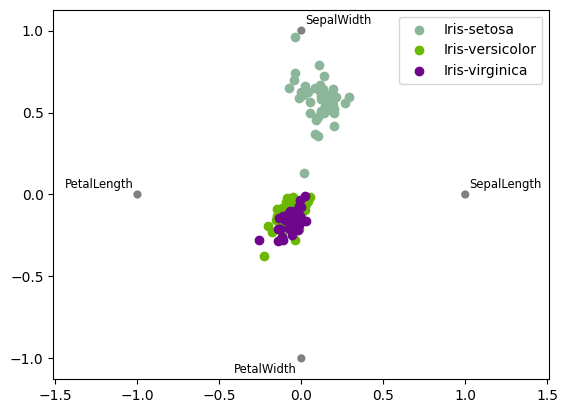

In [98]:
from pandas.plotting import radviz

data = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv")

plt.figure();

radviz(data, "Name");

General plot style arguments

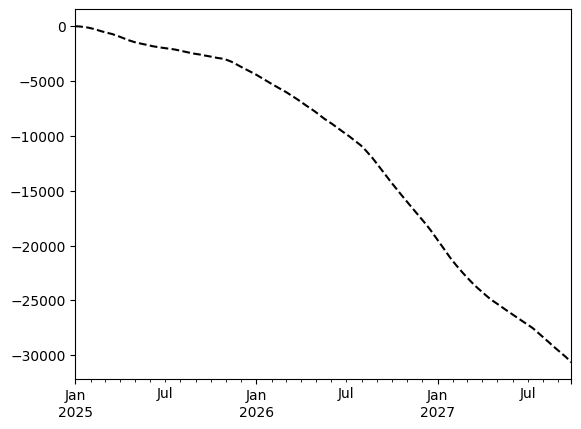

In [99]:
plt.figure();

ts.plot(style="k--", label="Series");

## Controlling the legend

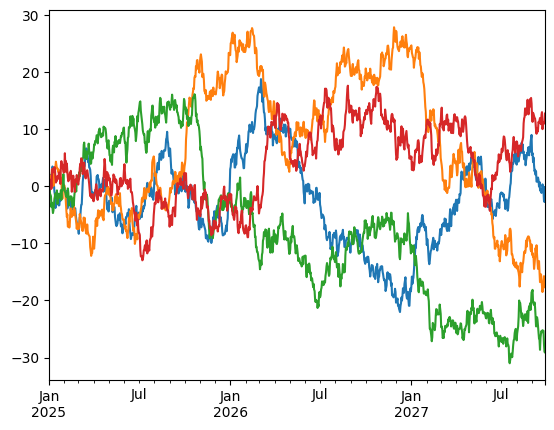

In [101]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot(legend=False);

## Controlling the labels

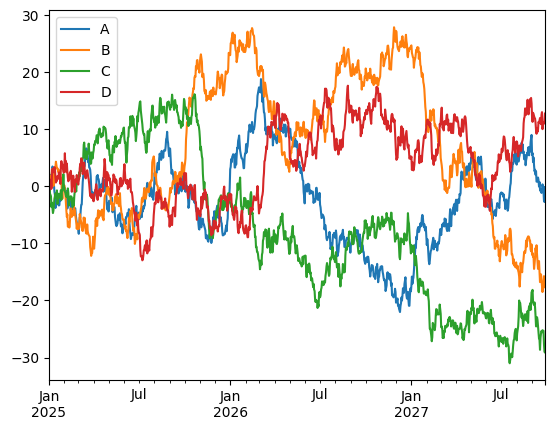

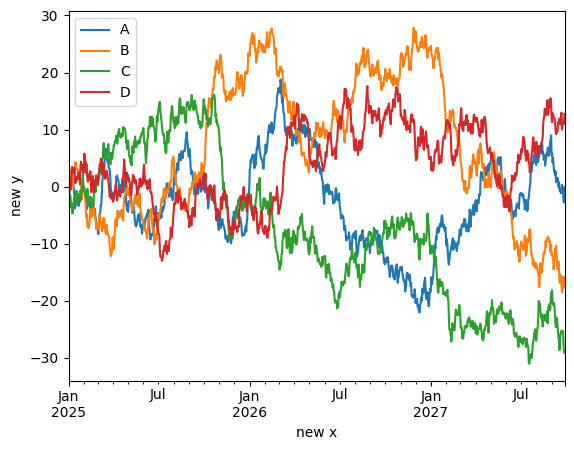

In [102]:
df.plot();

df.plot(xlabel="new x", ylabel="new y");

## Scales

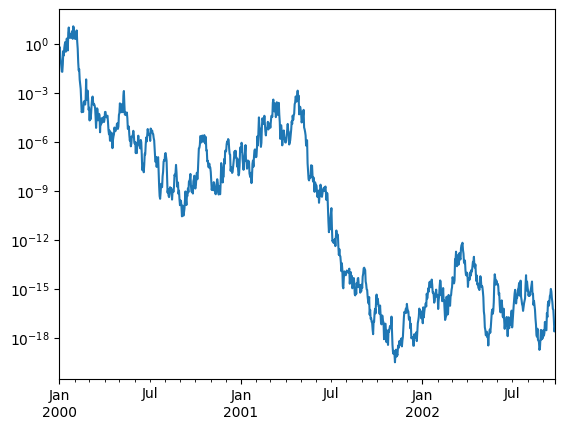

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True);

## Plotting on a secondary y-axis

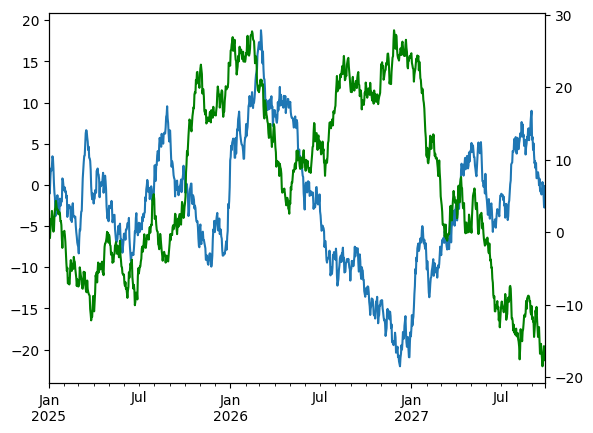

In [104]:
df["A"].plot();

df["B"].plot(secondary_y=True, style="g");


<Figure size 640x480 with 0 Axes>

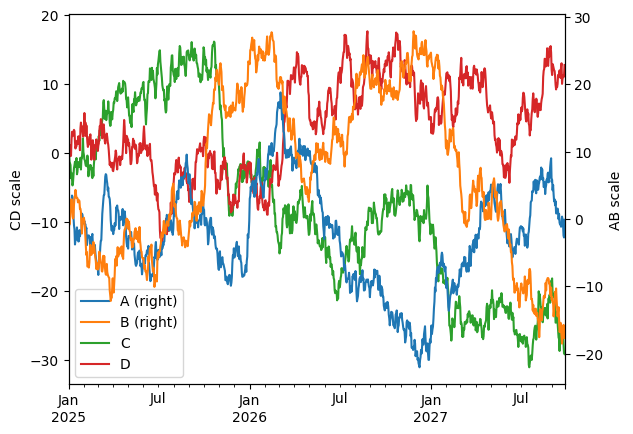

In [ ]:
plt.figure();
ax = df.plot(secondary_y=["A", "B"])
ax.set_ylabel("CD scale");
ax.right_ax.set_ylabel("AB scale");

<Figure size 640x480 with 0 Axes>

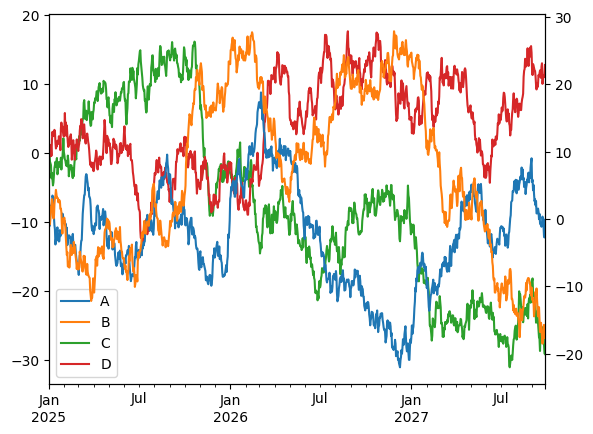

In [106]:
plt.figure();
df.plot(secondary_y=["A", "B"], mark_right=False);

## Suppressing tick resolution adjustment

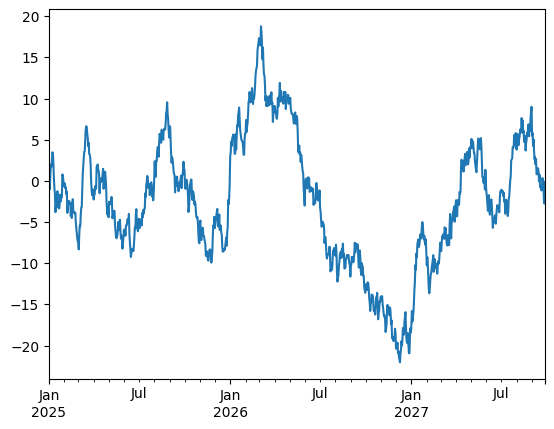

In [ ]:
plt.figure();
df["A"].plot();

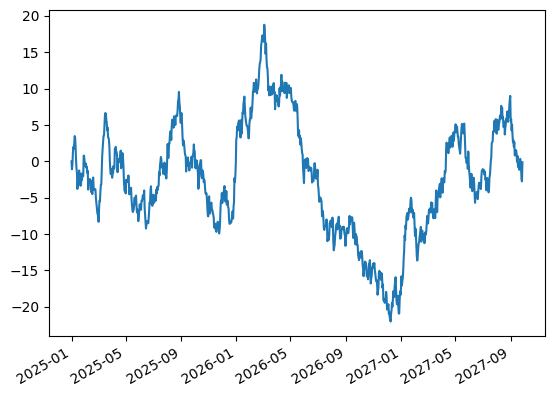

In [108]:
plt.figure();
df["A"].plot(x_compat=True);

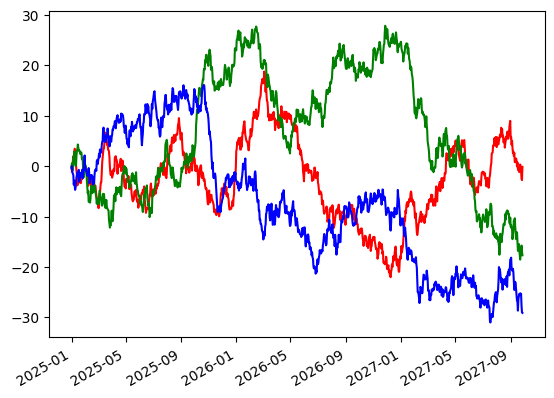

In [110]:
plt.figure();
with pd.plotting.plot_params.use("x_compat", True):
    df["A"].plot(color="r")
    df["B"].plot(color="g")
    df["C"].plot(color="b")

## Automatic date tick adjustment
 * TimedeltaIndex now uses the native matplotlib tick locator methods, it is useful to call the automatic date tick adjustment from matplotlib for figures whose ticklabels overlap.

### Subplots
* Each Series in a DataFrame can be plotted on a different axis with the subplots keyword:

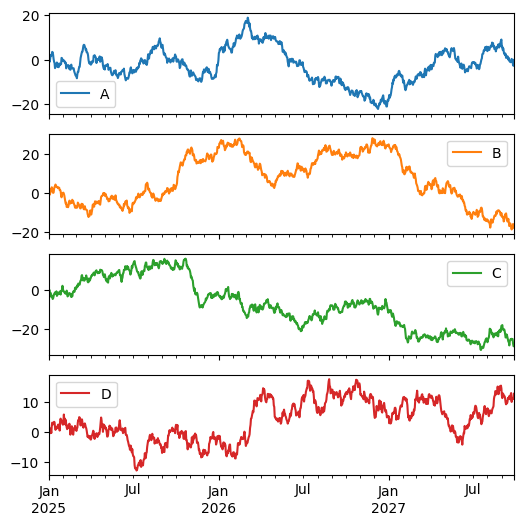

In [111]:
df.plot(subplots=True, figsize=(6,6));

## Using layout and targeting multiple axes

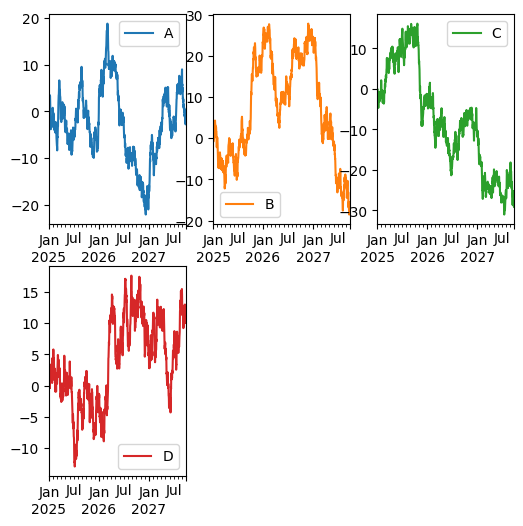

In [112]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

You can pass multiple axes created beforehand as list-like via ax keyword. This allows more complicated layouts. The passed axes must be the same number as the subplots being drawn.


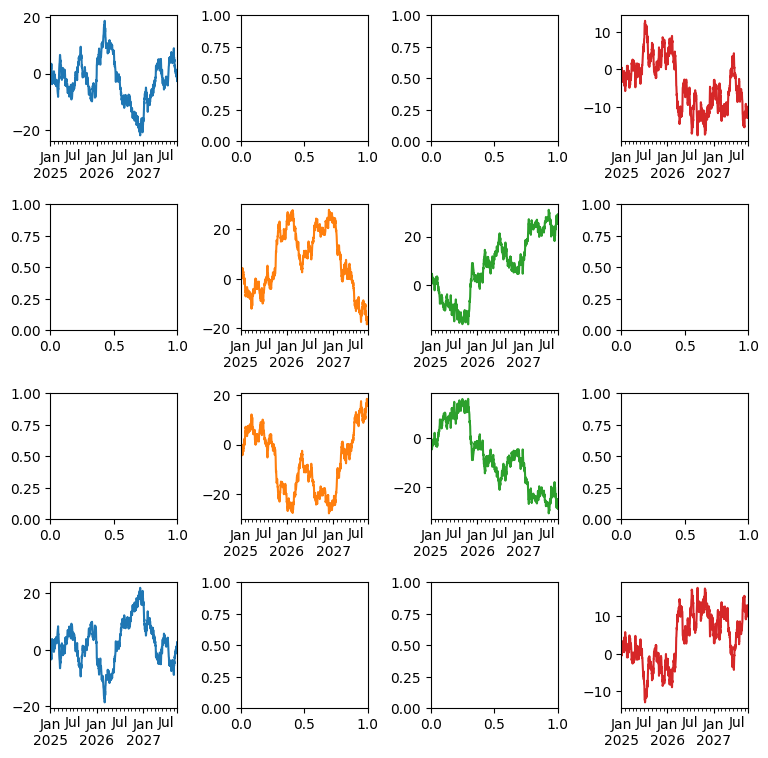

In [113]:
fig, axes = plt.subplots(4, 4, figsize=(9, 9))

plt.subplots_adjust(wspace=0.5, hspace=0.5)

target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]

target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]

df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);

(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False);


## Plotting tables
* Plotting with matplotlib table is now supported in
*DataFrame.plot() and Series.plot() 
 with a table keyword. The table keyword can accept bool, DataFrame or Series.

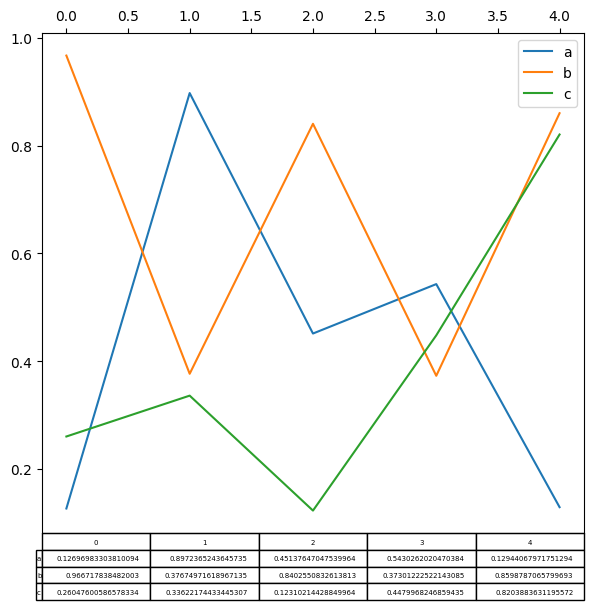

In [115]:
np.random.seed(123456)
fig, ax = plt.subplots(1, 1, figsize=(7, 6.5))
df = pd.DataFrame(np.random.rand(5, 3), columns=["a", "b", "c"])
ax.xaxis.tick_top()  # Display x-axis ticks on top.
df.plot(table=True, ax=ax);

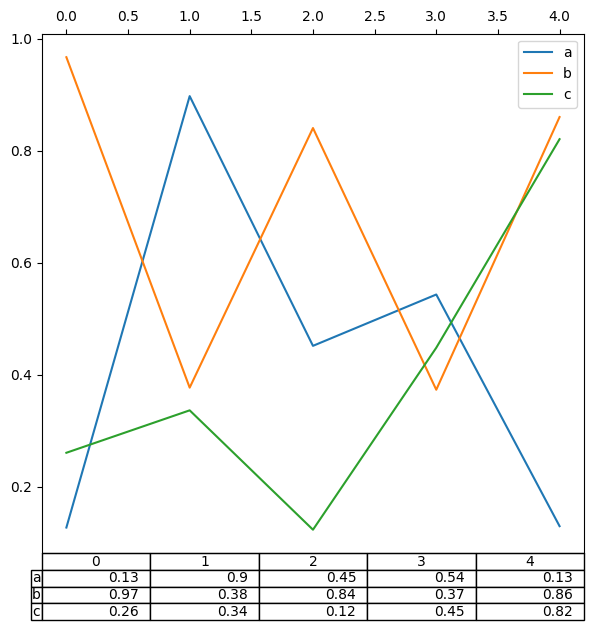

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.75))
ax.xaxis.tick_top()  # Display x-axis ticks on top.
df.plot(table=np.round(df.T, 2), ax=ax);

<Axes: >

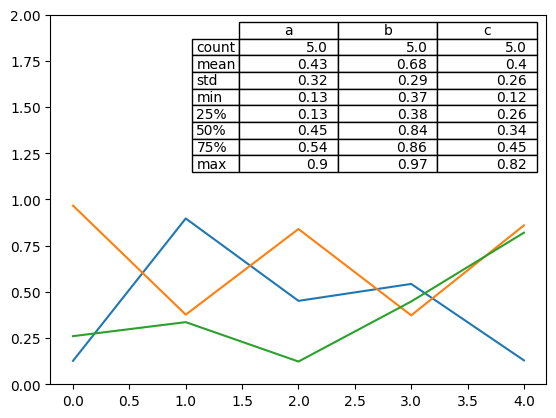

In [117]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2), loc="upper right", colWidths=[0.2, 0.2, 0.2]);
df.plot(ax=ax, ylim=(0, 2), legend=None)

## Colormaps
* A potential issue when plotting a large number of columns is that it can be difficult to distinguish some series due to repetition in the default colors.


<Figure size 640x480 with 0 Axes>

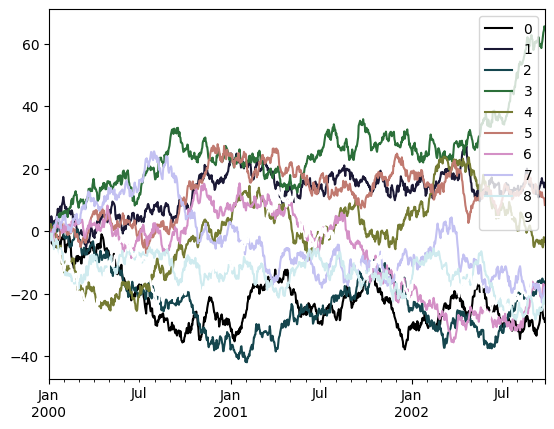

In [118]:
np.random.seed(123456)

df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)

df = df.cumsum()

plt.figure();

df.plot(colormap="cubehelix");

<Figure size 640x480 with 0 Axes>

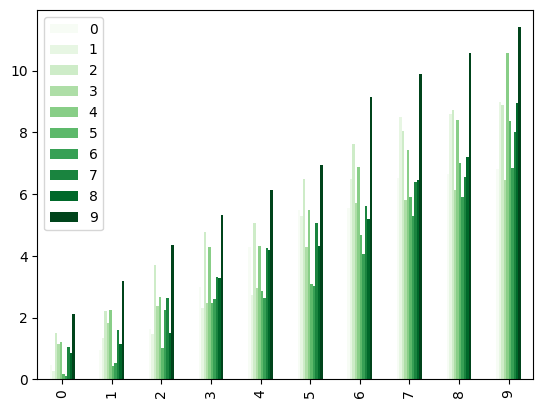

In [119]:
np.random.seed(123456)
dd = pd.DataFrame(np.random.randn(10, 10)).map(abs)
dd = dd.cumsum()
plt.figure();
dd.plot.bar(colormap="Greens");

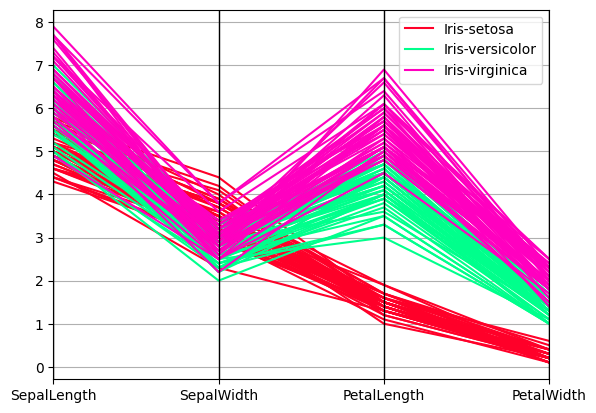

In [120]:
plt.figure();

parallel_coordinates(data, "Name", colormap="gist_rainbow");

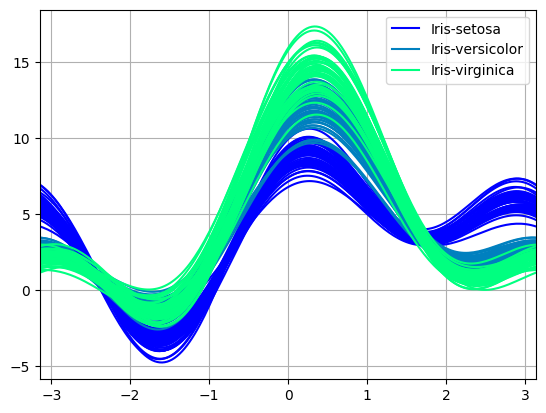

In [121]:
plt.figure();
andrews_curves(data, "Name", colormap="winter");

## Plotting directly with Matplotlib
* Pandas also automatically registers formatters and locators that recognize date indices, thereby extending date and time support to practically all plot types available in matplotlib. 
* Although this formatting does not provide the same level of refinement you would get when plotting via pandas, it can be faster when plotting a large number of points.

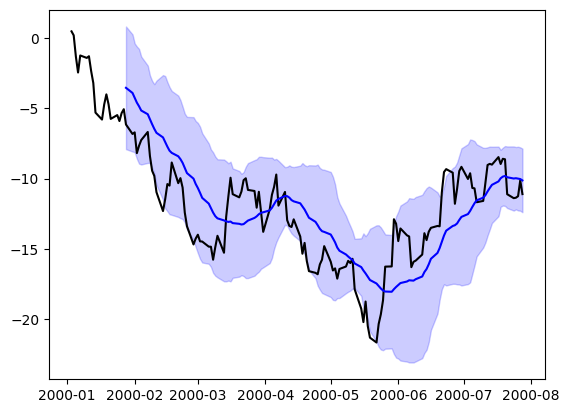

In [122]:
np.random.seed(123456)

price = pd.Series(
    np.random.randn(150).cumsum(),
    index=pd.date_range("2000-1-1", periods=150, freq="B"),
)


ma = price.rolling(20).mean()

mstd = price.rolling(20).std()

plt.figure();

plt.plot(price.index, price, "k");

plt.plot(ma.index, ma, "b");

plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2);